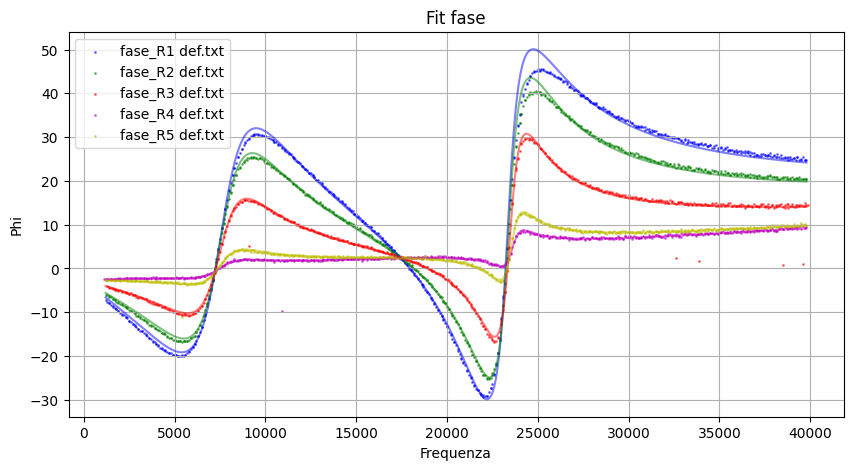

File 1 

Parametri [4.36377352e-03 9.89447222e-08 4.58808994e-04 1.01329479e-07
 7.38578067e+01 3.41776756e+00 3.62756766e+02] 

Errori [3.78446879e-05 6.77011103e-10 4.77589545e-07 1.25638022e-10
 8.59412064e-01 6.28361048e-02 2.42583221e+00] 

File 2 

Parametri [4.37504253e-03 9.91974516e-08 4.56201635e-04 1.01529557e-07
 7.31277369e+01 3.41605327e+00 5.07854733e+02] 

Errori [2.70196488e-05 4.85470182e-10 2.83969016e-07 7.88513793e-11
 5.95543700e-01 4.17842445e-02 2.34999638e+00] 

File 3 

Parametri [4.43345519e-03 9.80505780e-08 4.57092867e-04 1.00590726e-07
 7.27140878e+01 3.32181570e+00 1.05789955e+03] 

Errori [4.89735947e-05 1.35970037e-09 4.09550155e-07 1.75469141e-10
 1.96132345e+00 8.19862818e-02 9.03123308e+00] 

File 4 

Parametri [4.58596229e-03 9.21953982e-08 4.63770249e-04 9.79274225e-08
 8.52208746e+01 3.37114083e+00 9.54884037e+03] 

Errori [1.37398898e-04 4.35586812e-09 6.21455434e-07 3.66681783e-10
 7.45002745e+00 1.51411832e-01 2.42679680e+02] 

File 5 

Paramet

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Dati forniti
L1 = 4.576E-3  #4576
L2 = 481.5E-6 #481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
# R = (329.84, 470.53, 997.90, 9970.9) 

R = (381.84, 522.53, 1057.90, 10020.9, 4737.1) 
# R = (379.84, 520.53, 997.90, 9970.9) 

RL1 = 78.0
RL2 = 2.5

# Definizione delle funzioni per il modulo e la parte reale
def phase(f, L1, C1, L2, C2, RL1, RL2, R):
    
    mS = 6.20932558310695e-05
    qS = -2.6990047849767658
    mR = 0.00028198409330438157
    qR = -2.695525201755178
    
    W = 2 * np.pi * f
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    B1 = R + RL1 / (A1**2 + D1**2) + RL2 / (A2**2 + D2**2)
    B2 = (A1 * W * L1 - RL1 * D1) / (A1**2 + D1**2) + (A2 * W * L2 - RL2 * D2) / (A2**2 + D2**2)
    F = np.arctan(-B2/B1) 
    return F*(180/np.pi) + (mR*f + qR)


# Lista per memorizzare i parametri dei fit per ciascun file
params_list_mod = []
cov_list_mod=[]
params_list_real = []

# Definizione dei limiti per i parametri del fit
# bounds_list = [
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[0] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[0] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[1] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[1] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[2] - 100], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[2] + 100]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[3] - 1000], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[3] + 1000]),
# ]

# ottimale per ora
bounds_list0 = [
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[0] - 100], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[0] + 100]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[1] - 100], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[1] + 100]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[2] - 1000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[2] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[3] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[3] + 10000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[4] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[4] + 10000]),
]



# Iterazione attraverso i file e i limiti di resistenza
for file_name, bounds in zip(['fase_R1 def.txt', 'fase_R2 def.txt', 'fase_R3 def.txt', 'fase_R4 def.txt', 'fase_R5 def.txt'], bounds_list0):
    # Apertura del file in modalità di lettura
    with open(file_name, 'r') as file:
        # Lettura di tutte le righe del file
        lines = file.readlines()

    # Inizializzazione delle liste per memorizzare i dati
    x_values = []
    y_values = []
    errors_fit_list=[]

    # Iterazione attraverso le righe ed estrazione dei dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

    # Esecuzione del fit per il modulo
    params_mod, cov_mod= curve_fit(phase, x_values, y_values, bounds=bounds, maxfev=70000)
    params_list_mod.append(params_mod)
    cov_list_mod.append(cov_mod)
    
for cov in cov_list_mod:
    errors_fit_list.append(np.sqrt(np.diag(cov)))


# Plot dei dati sperimentali e dei fit per il modulo
plt.figure(figsize=(10, 5))
plt.title('Fit fase')
plt.xlabel('Frequenza')
plt.ylabel('Phi')

for params_mod, color in zip(params_list_mod, ['b', 'g', 'r', 'm', 'y']):
    x_fit = np.linspace(min(x_values), max(x_values), 1000)
    y_mod_fit = phase(x_fit, *params_mod)
    plt.plot(x_fit, y_mod_fit, linestyle='-', color=color, alpha=0.5)
    

for file_name, color in zip(['fase_R1 def.txt', 'fase_R2 def.txt', 'fase_R3 def.txt', 'fase_R4 def.txt', 'fase_R5 def.txt'], ['b', 'g', 'r', 'm', 'y']):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    x_values = []
    y_values = []
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))
    plt.scatter(x_values, y_values, label=file_name, s=1, color=color, alpha= 0.5)

plt.legend()
plt.grid()
plt.show()


for param, err, i in zip(params_list_mod, errors_fit_list, range(5)):
    print('File', i+1, '\n')
    print('Parametri', param, '\n')
    print('Errori', err, '\n')


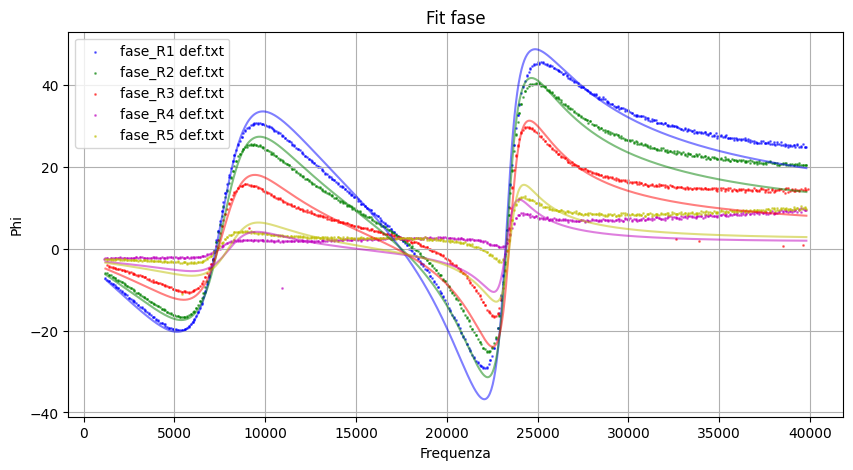

File 1 

Parametri [4.52327500e-03 9.31744499e-08 4.53879840e-04 1.02958011e-07
 8.79999827e+01 3.48372423e+00 2.85327781e+02] 

Errori [6.04080940e-05 1.45736238e-09 8.69700961e-07 2.36194086e-10
 2.42899490e+00 1.16825209e-01 3.51258463e+00] 

File 2 

Parametri [4.58544774e-03 9.03224554e-08 4.54677238e-04 1.02324940e-07
 8.79999989e+01 3.47453965e+00 4.20552808e+02] 

Errori [7.71903446e-05 1.90739445e-09 9.78044034e-07 2.72492128e-10
 3.28904000e+00 1.41940421e-01 6.44841466e+00] 

File 3 

Parametri [4.48304253e-03 9.20652628e-08 4.52395432e-04 1.01594468e-07
 8.79994577e+01 3.49522717e+00 7.24997236e+02] 

Errori [1.16440461e-04 3.20073073e-09 1.23511645e-06 3.59512150e-10
 5.40519389e+00 1.98363943e-01 1.66405831e+01] 

File 4 

Parametri [4.13211877e-03 9.05344185e-08 4.70364515e-04 9.93362266e-08
 8.66819672e+01 3.42272591e+00 2.83776085e+03] 

Errori [3.62881735e-04 1.20418194e-08 2.37739772e-06 1.18547318e-09
 2.07004558e+01 5.44646638e-01 2.06649020e+02] 

File 5 

Paramet

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Dati forniti
L1 = 4.576E-3  #4576
L2 = 481.5E-6 #481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
# R = (329.84, 470.53, 997.90, 9970.9) 

R = (379.84, 520.53, 1057.90, 10020.9, 4737.1) 
# R = (379.84, 520.53, 997.90, 9970.9) 

RL1 = 78.0
RL2 = 2.5
   
mS = 6.20932558310695e-05
qS = -2.6990047849767658
mR = 0.00028198409330438157
qR = -2.695525201755178
    

# Definizione delle funzioni per il modulo e la parte reale
def phase(f, L1, C1, L2, C2, RL1, RL2, R):
 
    W = 2 * np.pi * f
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    B1 = R + RL1 / (A1**2 + D1**2) + RL2 / (A2**2 + D2**2)
    B2 = (A1 * W * L1 - RL1 * D1) / (A1**2 + D1**2) + (A2 * W * L2 - RL2 * D2) / (A2**2 + D2**2)
    F = np.arctan(-B2/B1) 
    return F*(180/np.pi) + (mS * f +qS)


# Lista per memorizzare i parametri dei fit per ciascun file
params_list_mod = []
cov_list_mod=[]
params_list_real = []

# Definizione dei limiti per i parametri del fit
# bounds_list = [
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[0] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[0] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[1] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[1] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[2] - 100], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[2] + 100]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[3] - 1000], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[3] + 1000]),
# ]

# ottimale per ora
bounds_list0 = [
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[0] - 100], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[0] + 100]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[1] - 100], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[1] + 100]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[2] - 1000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[2] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[3] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[3] + 10000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[4] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[4] + 10000]),
]



# Iterazione attraverso i file e i limiti di resistenza
for file_name, bounds in zip(['fase_R1 def.txt', 'fase_R2 def.txt', 'fase_R3 def.txt', 'fase_R4 def.txt', 'fase_R5 def.txt'], bounds_list0):
    # Apertura del file in modalità di lettura
    with open(file_name, 'r') as file:
        # Lettura di tutte le righe del file
        lines = file.readlines()

    # Inizializzazione delle liste per memorizzare i dati
    x_values = []
    y_values = []
    errors_fit_list=[]

    # Iterazione attraverso le righe ed estrazione dei dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

    # Esecuzione del fit per il modulo
    params_mod, cov_mod= curve_fit(phase, x_values, y_values, bounds=bounds, maxfev=70000)
    params_list_mod.append(params_mod)
    cov_list_mod.append(cov_mod)
    
for cov in cov_list_mod:
    errors_fit_list.append(np.sqrt(np.diag(cov)))


# Plot dei dati sperimentali e dei fit per il modulo
plt.figure(figsize=(10, 5))
plt.title('Fit fase')
plt.xlabel('Frequenza')
plt.ylabel('Phi')

for params_mod, color in zip(params_list_mod, ['b', 'g', 'r', 'm', 'y']):
    x_fit = np.linspace(min(x_values), max(x_values), 1000)
    y_mod_fit = phase(x_fit, *params_mod)
    plt.plot(x_fit, y_mod_fit, linestyle='-', color=color, alpha=0.5)
    

for file_name, color in zip(['fase_R1 def.txt', 'fase_R2 def.txt', 'fase_R3 def.txt', 'fase_R4 def.txt', 'fase_R5 def.txt'], ['b', 'g', 'r', 'm', 'y']):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    x_values = []
    y_values = []
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))
        
    x_values = np.array(x_values)    
    plt.scatter(x_values, (y_values ), label=file_name, s=1, color=color, alpha= 0.5)

plt.legend()
plt.grid()
plt.show()


for param, err, i in zip(params_list_mod, errors_fit_list, range(5)):
    print('File', i+1, '\n')
    print('Parametri', param, '\n')
    print('Errori', err, '\n')